In [132]:
import pandas as pd

In [157]:
df = pd.read_csv('drug200.csv')

In [158]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25,drugY
1,47,M,LOW,HIGH,13,drugC
2,47,M,LOW,HIGH,10,drugC
3,28,F,NORMAL,HIGH,8,drugX
4,61,F,LOW,HIGH,18,drugY


### Decision tree classifier from sklearn

In [159]:
# Divide the datafrm between target and the indeendant variables (features and label)
x = df.iloc[:,0:5]

In [160]:
# Need to translate strings into numbers
from sklearn.preprocessing import LabelEncoder

In [161]:
# Create different objects
sexe = LabelEncoder()
bp = LabelEncoder()
cholesterol = LabelEncoder()


In [162]:
# Create extra column in the features dataframe
# Transform var/strings by numbers using fit_transform

x['sexe_n'] = sexe.fit_transform(x['Sex'])
x['bp_n'] = bp.fit_transform(x['BP'])
x['cholesterol_n'] = cholesterol.fit_transform(x['Cholesterol'])

In [163]:
# Do the same for label
drug = LabelEncoder()
df['Drug_n'] = drug.fit_transform(df['Drug'])
y_n = df['Drug_n']

In [164]:
# Drop features columns (because useless)

x_n = x.drop(['Sex', 'BP', 'Cholesterol'], axis = 'columns')
x_n

,Age,Na_to_K,sexe_n,bp_n,cholesterol_n
0,23,25,0,0,0
1,47,13,1,1,0
2,47,10,1,1,0
3,28,8,0,2,0
4,61,18,0,1,0
...,...,...,...,...,...
195,56,12,0,1,0
196,16,12,1,1,0
197,52,10,1,2,0
198,23,14,1,2,1


In [141]:
y_n, x_n

(0      4
 1      2
 2      2
 3      3
 4      4
       ..
 195    2
 196    2
 197    3
 198    3
 199    3
 Name: Drug_n, Length: 200, dtype: int32,
      Age  Na_to_K  sexe_n  bp_n  cholesterol_n
 0     23       25       0     0              0
 1     47       13       1     1              0
 2     47       10       1     1              0
 3     28        8       0     2              0
 4     61       18       0     1              0
 ..   ...      ...     ...   ...            ...
 195   56       12       0     1              0
 196   16       12       1     1              0
 197   52       10       1     2              0
 198   23       14       1     2              1
 199   40       11       0     1              1
 
 [200 rows x 5 columns])

In [142]:
# Need to split data (train and test)

nb_train = round(0.7 * len(x_n))
nb_test = round(0.3 * len(x_n))
print('nb data train : ', nb_train)
print('nb data test : ', nb_test)

nb data train :  140
nb data test :  60


In [143]:
x_train, y_train = x_n.iloc[0:nb_train], y_n.iloc[0:nb_train]
x_test, y_test = x_n.iloc[nb_train:len(x_n)], y_n.iloc[nb_train:len(x_n)]

In [144]:
x_test.head()
len(y_train)

140

In [145]:
# Train the classifier
from sklearn import tree

In [146]:
model = tree.DecisionTreeClassifier(criterion='entropy') # can change criterion to entropy, but Gini is pretty popular for decision tree

In [147]:
model.fit(x_train, y_train) 
# model is now ready to predict

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
# score was 1 with 80% of data trained ==> overfitting
model.score(x_test, y_test)

0.9833333333333333

In [149]:
x_n.iloc[[0]]

,Age,Na_to_K,sexe_n,bp_n,cholesterol_n
0,23,25,0,0,0


In [150]:
# prediction for the first row 
print(model.predict(x_n.iloc[[150]]) == y_n.iloc[[150]])

150    True
Name: Drug_n, dtype: bool


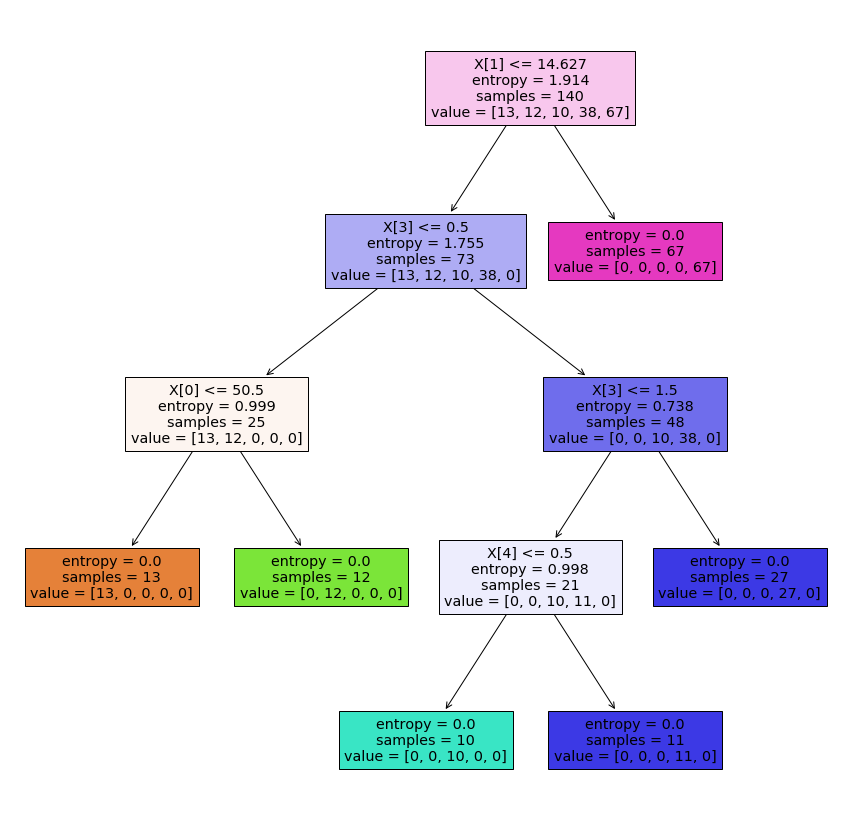

In [151]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(model, filled=True)
plt.show()

In [152]:
from decision_tree_algo import *

In [153]:
nb_features = len(x_n.columns)
nb_labels = y_n.max() + 1
list_lab = list(range(nb_labels)) # probably useless
list_gini = [0] * nb_features


In [154]:
for y in range(nb_labels):
    print(y)

0
1
2
3
4


In [155]:
for i in range(nb_features):
    list_lab = list(range(nb_labels)) # probably useless
    list_gini = [0] * nb_features
    feature = df[df.columns[i]]
    frames = [feature, y_n]
    dt = pd.concat(frames, keys=['x', 'y'])
    #for y in range(nb_labels):
        

In [156]:
list_gini[y] = len(dt[])


SyntaxError: invalid syntax (<ipython-input-156-e9ad79554c52>, line 1)

In [ ]:
feature = df[df.columns[i]]
frames = [feature, y_n]
dt = pd.concat(frames, keys=['x', 'y'])

x  0    25
   1    13
   2    10
   3     8
   4    18
dtype: float64

In [167]:
dt["x"]

0      25
1      13
2      10
3       8
4      18
       ..
195    12
196    12
197    10
198    14
199    11
Length: 200, dtype: float64

In [165]:
len(dt[(dt["y"]==0)])

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

x  0      25.355
   1      13.093
   2      10.114
   3       7.798
   4      18.043
           ...  
y  195     2.000
   196     2.000
   197     3.000
   198     3.000
   199     3.000
Length: 400, dtype: float64

In [ ]:
dt

[0      23
 1      47
 2      47
 3      28
 4      61
        ..
 195    56
 196    16
 197    52
 198    23
 199    40
 Name: Age, Length: 200, dtype: int64,
 0      4
 1      2
 2      2
 3      3
 4      4
       ..
 195    2
 196    2
 197    3
 198    3
 199    3
 Name: Drug_n, Length: 200, dtype: int32]

In [ ]:
dt = pd.concat(frames)

In [ ]:
decision_tree_algo(x_n,y_n)

   Age  Na_to_K  sexe_n  bp_n  cholesterol_n
0   23   25.355       0     0              0
1   47   13.093       1     1              0
2   47   10.114       1     1              0
3   28    7.798       0     2              0
4   61   18.043       0     1              0
